<a href="https://colab.research.google.com/github/suganthialagumalai/suganthialagumalai/blob/main/LRGroundCricketChirpsAssessment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [2]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

In [3]:
df

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [4]:
df.shape

(15, 2)

In [5]:
X = df.drop('Chirps/Second', axis =1)
Y = df['Chirps/Second']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 5442)

In [7]:
LR = LinearRegression(fit_intercept=True, normalize=True)
LR.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True)

In [8]:
Y_pred = LR.predict(X_test)

In [9]:
LR.score(X_train, Y_train)

0.768293604813739

In [10]:
LR.score(X_test, Y_test)

0.34269584908450534

In [11]:
Lasso_reg = Lasso(alpha = 0.1, max_iter=1000, tol=0.001,)
Lasso_reg.fit(X_train, Y_train)

Lasso(alpha=0.1, tol=0.001)

In [12]:
Lasso_reg.score(X_train, Y_train)


0.7682223938349843

In [13]:
Lasso_reg.score(X_test, Y_test)

0.3396320309218178

In [14]:
Rid_reg = Ridge(alpha = 1.0, max_iter=1000, tol=0.001)
Rid_reg.fit(X_train, Y_train)

Ridge(max_iter=1000)

In [15]:
Rid_reg.score(X_train,Y_train)

0.7682910249673727

In [16]:
Rid_reg.score(X_test,Y_test)

0.34211907315195655

In [17]:
extrapolation = {"Ground Temperature": [95,0], "Chirps/Second": [0,18]} 
df2 = pd.DataFrame(extrapolation)
df2

,Ground Temperature,Chirps/Second
0,95,0
1,0,18


In [18]:
X2 = df2.drop('Chirps/Second', axis = 1)
X2

,Ground Temperature
0,95
1,0


In [19]:
df2['Chirps/Second'] = LR.predict(X2)

In [20]:
df2

,Ground Temperature,Chirps/Second
0,95,19.821318
1,0,1.706098


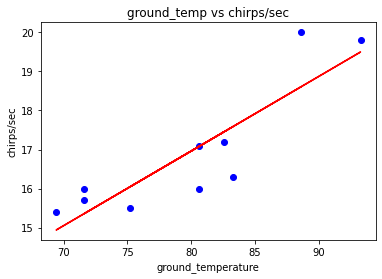

In [21]:
plt.scatter(X_train, Y_train,color='blue')
plt.plot(X_train, LR.predict(X_train), color= 'red')
plt.title('ground_temp vs chirps/sec')
plt.xlabel('ground_temperature')
plt.ylabel('chirps/sec')
plt.show()

In [22]:
X = df.drop('Ground Temperature', axis =1)
Y = df['Ground Temperature']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 5442)

In [24]:
LR = LinearRegression(fit_intercept=True, normalize=False )
LR.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


LinearRegression(normalize=False)

In [25]:
Y_pred = LR.predict(X_test)

In [26]:
LR.score(X_train, Y_train)

0.7682936048137392

In [27]:
LR.score(X_test, Y_test)

0.17498205260340693

In [28]:
Lasso_reg = Lasso(alpha = 0.1, max_iter=1000, tol=0.001,)
Lasso_reg.fit(X_train, Y_train)

Lasso(alpha=0.1, tol=0.001)

In [29]:
Lasso_reg.score(X_test, Y_test)

0.19144926759545233

In [30]:
Lasso_reg.score(X_train, Y_train)


0.7682223938349841

In [31]:
Rid_reg = Ridge(alpha = 1.0, max_iter=1000, tol=0.001)
Rid_reg.fit(X_train, Y_train)

Ridge(max_iter=1000)

In [32]:
Rid_reg.score(X_train, Y_train)

0.7672223172265926

In [33]:
Rid_reg.score(X_test, Y_test)

0.23684551398019427

In [34]:
Interpolation = {"Ground Temperature": [95,0], "Chirps/Second": [0,18]} 
df3 = pd.DataFrame(Interpolation)
df3

,Ground Temperature,Chirps/Second
0,95,0
1,0,18


In [35]:
X3 = df3.drop('Ground Temperature', axis = 1)
X3

,Chirps/Second
0,0
1,18


In [36]:

df3['Ground Temperature'] = Rid_reg.predict(X3)

In [37]:
df3

,Ground Temperature,Chirps/Second
0,14.130971,0
1,83.946505,18
